## Bayesian Linear Regression

\begin{eqnarray}
w & \sim & {\mathcal N}(w; 0, \frac{1}{\lambda} I_p ) \\
y|w & \sim & {\mathcal N}(y; A w, \frac{1}{\rho} I_N ) 
\end{eqnarray}

The joint distribution

\begin{eqnarray}
\left(\begin{array}{c} w \\ y \end{array} \right) & = & 
{\mathcal N}\left( \left(\begin{array}{c} 0 \\ 0 \end{array} \right), 
\left(\begin{array}{cc} \frac{1}{\lambda} I_p & \frac{1}{\lambda} A^\top \\ \frac{1}{\lambda} A & \frac{1}{\lambda} A A^\top + \frac{1}{\rho} I_N \end{array} \right) 
\right) 
\end{eqnarray}

\begin{eqnarray}
p(y) & = & {\mathcal N}\left(y; 0, \frac{1}{\lambda} A A^\top + \frac{1}{\rho} I_N \right) \\
p(w|y) & = & {\mathcal N}\left(w; m, S\right) \\
m & = & A^\top \left(A A^\top + \frac{\lambda}{\rho} I_N \right)^{-1}  y \\
S & = & \frac{1}{\lambda} \left( I_p -  A^\top \left( A A^\top + \frac{\lambda}{\rho} I_N  \right)^{-1}  A \right)
\end{eqnarray}




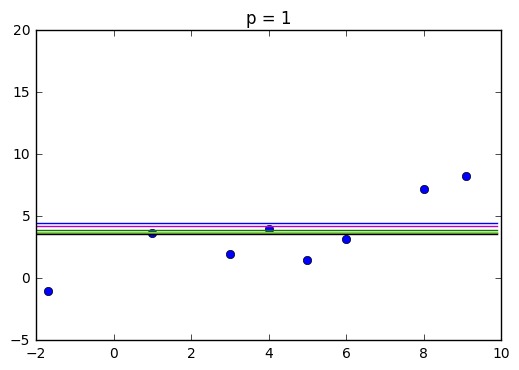

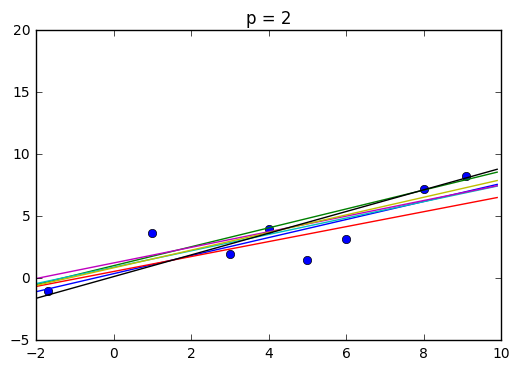

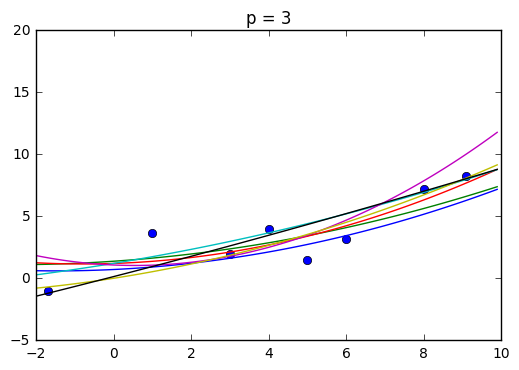

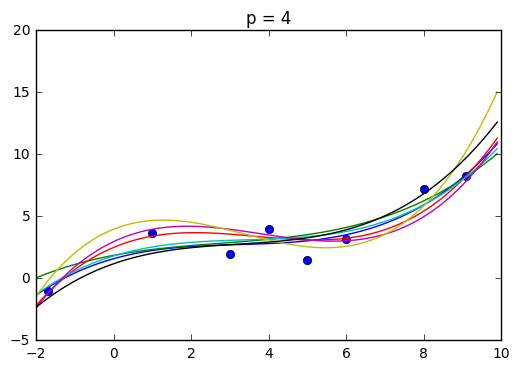

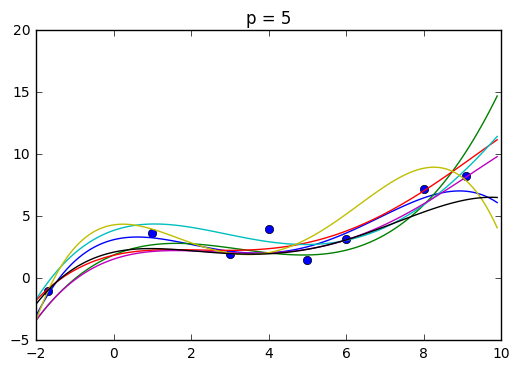

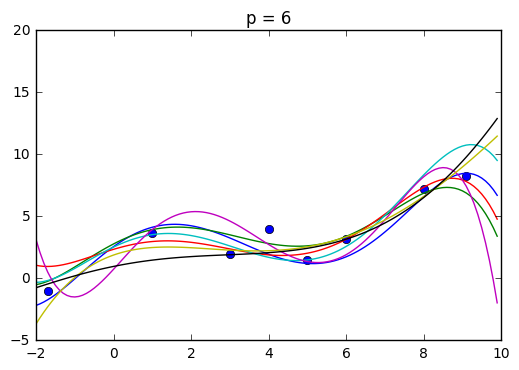

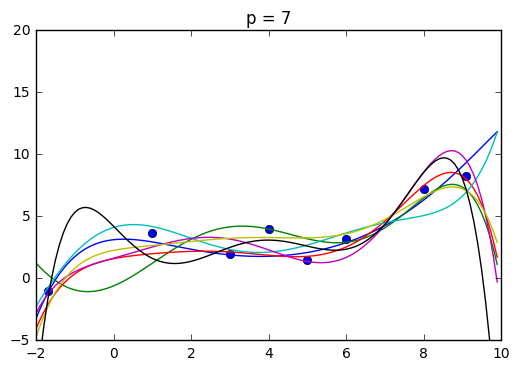

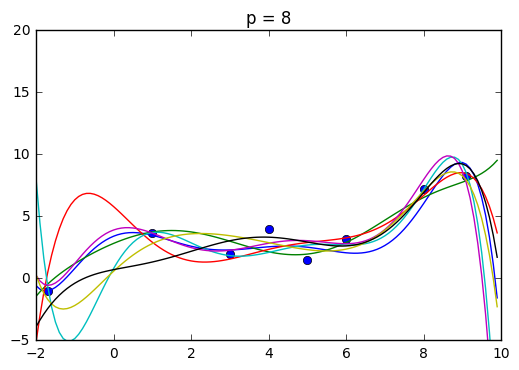

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt

x = np.array([-1.7,1,3,4,5,6, 8, 9.1])
y = np.array([-1,3.7,2,4,1.5,3.2,7.2, 8.3])

xx = np.array(np.arange(-2,10,0.1))

N = len(x)
lam = 0.1
rho = 1

for degree in range(8):

    p = degree+1

    #A = np.hstack((np.power(x,0), np.power(x,1), np.power(x,2)))
    A = np.vstack((np.power(x,i) for i in range(p))).T
    A2 = np.vstack((np.power(xx,i) for i in range(p))).T



    temp = np.linalg.solve(A.dot(A.T)+ lam/rho*np.eye(N), A)
    S = 1./lam*(np.eye(p) - A.T.dot( temp ))
    m = temp.T.dot(y)

    plt.plot(x, y, 'bo')

    for i in range(7):
        ww = np.random.multivariate_normal(m, S)
        plt.plot(xx, A2.dot(ww))

    plt.title('p = '+str(p))
    plt.gca().set_ylim([-5,20])
    plt.show()

Marginal Likelihood 

1 -319.679541563
2 -100.369255031
3 -94.8373754043
4 -53.9982099831
5 -50.4389456611
6 -56.4891805827
7 -62.0646897069
8 -71.705426998
9 -72.4158897766
10 -75.4860903378


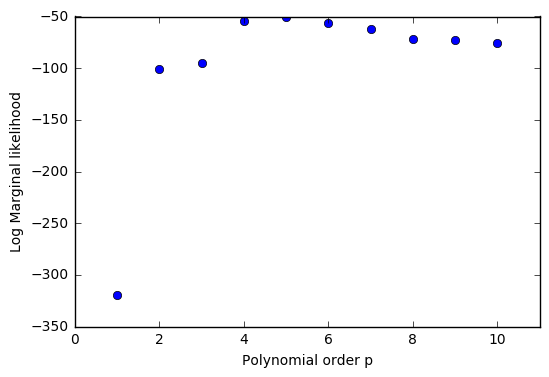

In [2]:

lam = 0.1
rho = 10

DEG = range(10)
mLL = []
for degree in DEG:    
    p = degree+1
    A = np.vstack((np.power(x,i) for i in range(degree+1))).T
    S_y = A.dot(A.T)/lam + np.eye(N)/rho

    marg_loglik = -0.5*np.linalg.slogdet(2*np.pi*S_y)[1] - 0.5*y.T.dot(np.linalg.solve(S_y, y))
    print(p, marg_loglik)
    mLL.append(marg_loglik)

plt.plot([d+1 for d in DEG], mLL, 'o')
plt.xlabel('Polynomial order p')
plt.ylabel('Log Marginal likelihood')
plt.gca().set_xlim([0, max(DEG)+2])
plt.show()

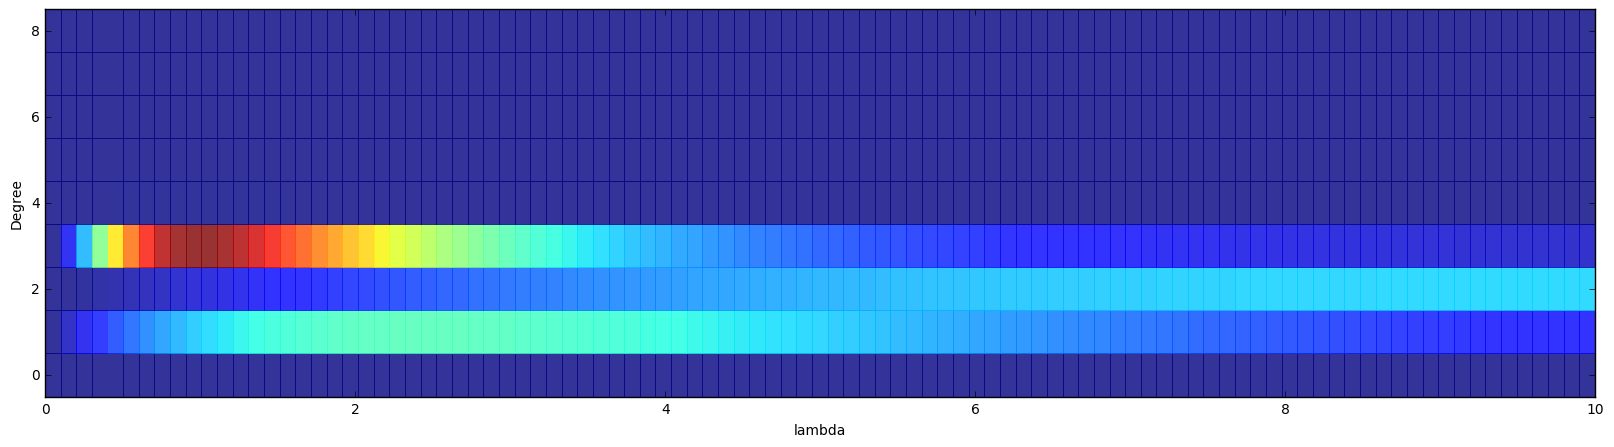

In [3]:
rho = 2

MaxDegree = 10
LAM = np.linspace(0.001,10,100)
P = np.array(range(MaxDegree))

MLL = np.zeros((MaxDegree, len(LAM)))

for degree in P:
    p = degree+1
    A = np.vstack((np.power(x,i) for i in range(degree+1))).T
    mLL = []
    for lam in LAM:    
        S_y = A.dot(A.T)/lam + np.eye(N)/rho

        marg_loglik = -0.5*np.linalg.slogdet(2*np.pi*S_y)[1] - 0.5*y.T.dot(np.linalg.solve(S_y, y))
        mLL.append(marg_loglik)
        #print(p, marg_loglik)
    
    MLL[degree,:] = mLL
    
    
#plt.plot(LAM, np.exp(mLL-max(mLL)))
#plt.xlabel('lambda')
#plt.ylabel('Marginal likelihood (Scaled)')
#plt.show()

#plt.plot(LAM, mLL)
#plt.xlabel('lambda')
#plt.ylabel(' Log Marginal likelihood)')
#plt.show()
plt.figure(figsize=(20,5))
D = np.exp(MLL-np.max(MLL))
#plt.imshow()
ax = plt.gca()
ax.pcolor(LAM, P-0.5, D, cmap=plt.cm.jet, alpha=0.8, snap=False)
ax.set_xlim([LAM[0],LAM[-1]])
ax.set_ylim([-0.5,MaxDegree-1.5])
plt.xlabel('lambda')
plt.ylabel('Degree')
plt.show()


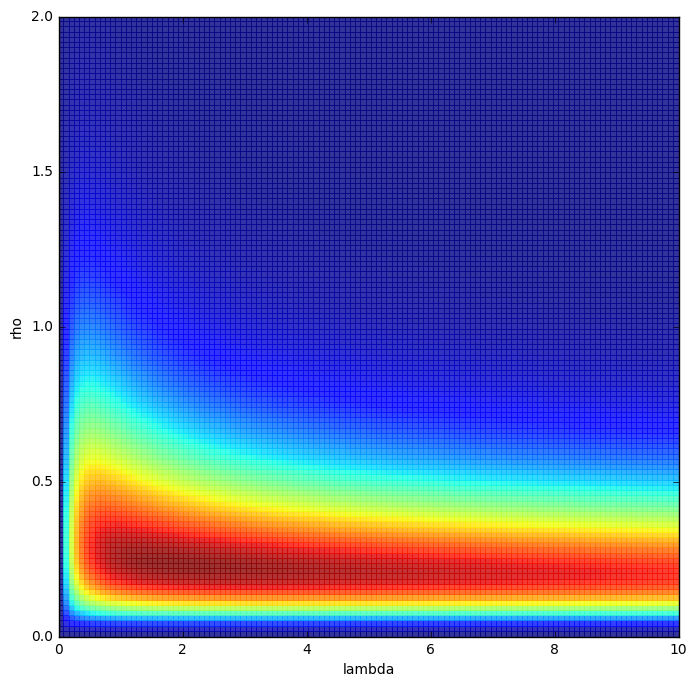

In [4]:
degree = 3
p = degree+1

LAM = np.linspace(0.001,10,120)
RHO = np.linspace(0.001,2,120)

MLL = np.zeros((len(RHO), len(LAM)))

for i,rho in enumerate(RHO):
    A = np.vstack((np.power(x,i) for i in range(degree+1))).T
    mLL = []
    for lam in LAM:    
        S_y = A.dot(A.T)/lam + np.eye(N)/rho

        marg_loglik = -0.5*np.linalg.slogdet(2*np.pi*S_y)[1] - 0.5*y.T.dot(np.linalg.solve(S_y, y)) - np.log(lam) - np.log(rho)
        mLL.append(marg_loglik)
        #print(p, marg_loglik)
    
    MLL[i,:] = mLL
    
    
#plt.plot(LAM, np.exp(mLL-max(mLL)))
#plt.xlabel('lambda')
#plt.ylabel('Marginal likelihood (Scaled)')
#plt.show()

#plt.plot(LAM, mLL)
#plt.xlabel('lambda')
#plt.ylabel(' Log Marginal likelihood)')
#plt.show()
plt.figure(figsize=(8,8))
D = np.exp(MLL-np.max(MLL))
#plt.imshow()
ax = plt.gca()
ax.pcolor(LAM, RHO, D, cmap=plt.cm.jet, alpha=0.8, snap=False)
ax.set_xlim([LAM[0],LAM[-1]])
ax.set_ylim([RHO[0],RHO[-1]])
plt.xlabel('lambda')
plt.ylabel('rho')
plt.show()
